In [8]:
from subprocess import check_output
import subprocess
import os
import sys
import json
import networkx as nx
import matplotlib.pyplot as plt 
from pyvis.network import Network
from Modules.NetVisualizer.net_visualizer import *
from Modules.NetBuilder.net_builder import net_build
from Utils.scripts import *
import pandas as pd
from random import randint
import seaborn as sns
from wordcloud import WordCloud

# DaScra
Uses DaScra code to mine the archive and get a set of stories in a fandom and their information

In [2]:
data_to_read='./OutputFiles/SuperNaturalDataset/superNatural_dascra_output.xlsx'

stories_df= pd.read_excel(data_to_read,
              dtype={
                  'AdditionalTags': str, 'ArchiveWarning': str,
                  'Author': str, 'Bookmarks': str,
                  'Category': str, 'Chapters': str,
                  'Characters': str, 'Comments': str,
                  'Fandom': str, 'Hits': int,
                  'Kudos': object, 'Language': str,
                  'Rating': str, 'Relationship': str,
                  'Series': str, 'Part': float,
                  'SourceURL': str, 'Title': str,
                  'Updated': str, 'Words': str,
              }) 
# stories_df=stories_df[['Title', 'AdditionalTags']]

In [3]:
stories_df=stories_df.drop_duplicates()
stories_df=stories_df.loc[stories_df.Language=='English']
stories_df=stories_df.drop(columns=['Comments','Hits','Kudos','SourceURL'])


In [49]:
stories_df.duplicated(subset=['Title','AdditionalTags',]).sum()
stories_df.duplicated(subset=['Title','AdditionalTags','Chapters','Part','Author','Updated']).sum()
stories_df.duplicated().sum()
# stories_df.duplicated(subset=['AdditionalTags']).sum()


67

In [4]:
stories_df['AdditionalTags'].map(str)


0         Original Character(s), Apocalypse, Post-Apocal...
1         References to Croatoan/Endverse (Supernatural)...
2         Fluff, non-sexual nudity, reader has broken li...
3         Found Family, Winchester Sister, Destiel - Fre...
4         Reader-Insert, Trickster - Freeform, Mystery S...
                                ...                        
100015                                                Fluff
100016                  Alternate Universe - Modern Setting
100017    Alternate Universe - Human, Alternate Universe...
100018    Blood and Gore, Blood Kink, Alternate Universe...
100019                           Implied/Referenced Torture
Name: AdditionalTags, Length: 95270, dtype: object

In [40]:
stories_df['AdditionalTags']=stories_df['AdditionalTags'].map(str)
# DO it better all in one pass
additional_tags=','.join([','.join(tags.split(",")) for tags in stories_df["AdditionalTags"][:1000]]).replace("/",'*s*').replace(".",'*d*').split(',')
additional_tags = [item.strip() for item in additional_tags]
print(len(additional_tags))
# additional_tags=list(set(additional_tags))
# print(len(additional_tags))

14014


<AxesSubplot:ylabel='Count'>

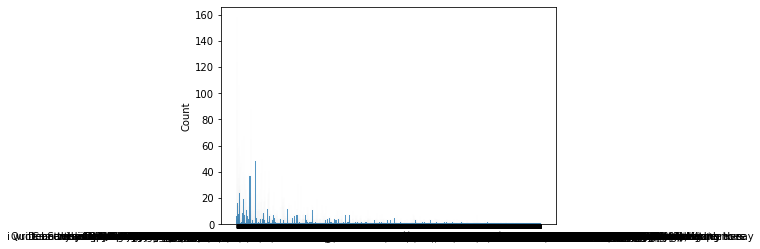

In [6]:
sns.histplot(additional_tags)

In [10]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(','.join(additional_tags))

In [36]:
a={}
while(len(additional_tags)>0):
    a[additional_tags[0]]= a[additional_tags[0]]+1 if additional_tags[0] in a.keys() else 1
    additional_tags.remove(additional_tags[0])

In [41]:
[a.pop(key) for key in a.copy() if a[key]<=20].__len__()

873

In [42]:
a


{'Human Castiel (Supernatural)': 31,
 'Angst': 158,
 'Fluff': 124,
 'Fluff and Angst': 49,
 'Slow Burn': 87,
 'Canon-Typical Violence': 58,
 'Eventual Smut': 35,
 'Hurt*s*Comfort': 106,
 'Romance': 26,
 'Oral Sex': 38,
 'Fluff and Smut': 35,
 'Destiel - Freeform': 29,
 'Protective Dean Winchester': 60,
 'Protective Sam Winchester': 25,
 'Protective Castiel (Supernatural)': 24,
 'Crossover': 27,
 'Smut': 52,
 'First Time': 30,
 'Mutual Pining': 44,
 'Hand Jobs': 26,
 'Emotional Hurt*s*Comfort': 47,
 'Angst and Hurt*s*Comfort': 31,
 'Anal Sex': 64,
 'Grief*s*Mourning': 24,
 'Blow Jobs': 40,
 'Post-Traumatic Stress Disorder - PTSD': 36,
 'Alternate Universe': 67,
 'Happy Ending': 38,
 'Anal Fingering': 31,
 'Established Castiel*s*Dean Winchester': 27,
 'Castiel Loves Dean Winchester': 26,
 'Dean Winchester Loves Castiel': 26,
 'Domestic Fluff': 39,
 'nan': 37,
 'Alpha Castiel (Supernatural)': 26,
 'Omega Dean Winchester': 26,
 'Bad Parent John Winchester': 24,
 'Mpreg': 25,
 'Implied*s*Re

<AxesSubplot:>

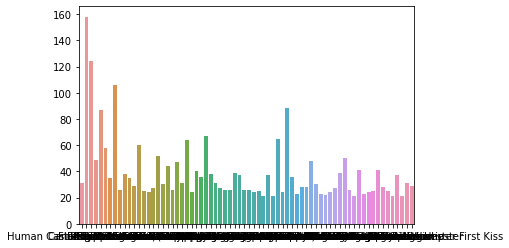

In [43]:
sns.barplot(x=list(a.keys()), y=list(a.values()))


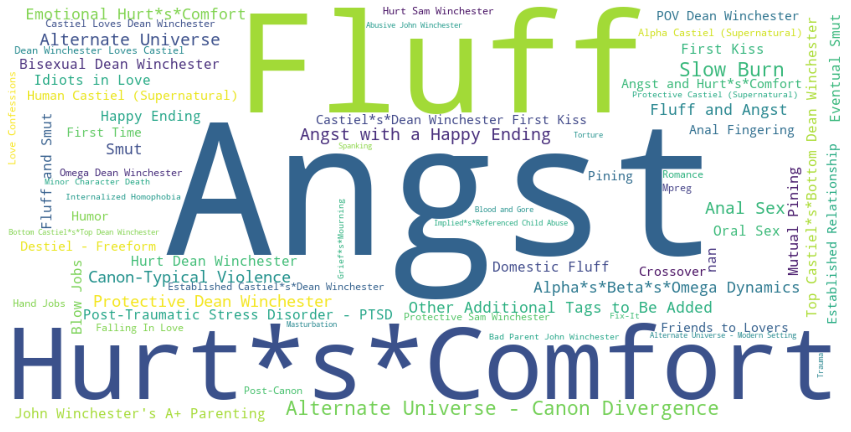

In [48]:
wordcloud = WordCloud(width = 1000, height = 500,background_color="white").generate_from_frequencies(a)

plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(wordcloud)

## Cleaning

In [ ]:
stories_df['Additional Tags:']=stories_df['Additional Tags:'].str.split(',')
stories_df['Additional Tags:']=stories_df['Additional Tags:'].apply(lambda x: [item.strip() for item in x])
# stories_df['Additional Tags:']=stories_df['Additional Tags:'].apply(lambda x: ','.join(x))

In [ ]:
stories_df['Title:']=stories_df['Title:'].apply(lambda x: x.strip())
# stories_df['Title:']


# TagScra
From a set of tags it scrap the RATAS in the archive and create JSON files with the info

In [ ]:
#TODO add the output file name of the JSON tag-data as parameter
args_to_tags_scraper=['node', './Modules/TagScraping/scraper.js' ]


tag_structure_file_name='current_tag_net'
# additional_tags=["Hogwarts Eighth Year",'Hogwarts Era',"Hogwarts Fourth Year"]
# additional_tags=["Deaf Character", "Disability","Hogwarts Eighth Year",'Hogwarts Era',"Hogwarts Fourth Year"]


# tag_structure_file_name='Disability_current_tag_net'
# additional_tags=["Disability"]


# tag_structure_file_name='Disability_old_tag_net'
# additional_tags=["Disability"]
# args_to_tags_scraper.extend(['-av','old'])



args_to_tags_scraper.extend(['-of',tag_structure_file_name])
args_to_tags_scraper.extend(['-t'])
args_to_tags_scraper.extend(additional_tags)

# p = check_output(args_to_tags_scraper)

with open('test.log', 'wb') as f: 
    process = subprocess.Popen(args_to_tags_scraper, stdout=subprocess.PIPE)
    for c in iter(lambda: process.stdout.read(1), b''): 
        sys.stdout.write(c.decode())



# Building the Network and Visuals

## Disability and Ableism Databases

### Disability Database


In [2]:
#Disability database
database_path='./OutputFiles/disability_rata_database'
disability_graph_list=[]

for filename in os.listdir(database_path):
   file_path=os.path.join(os.path.abspath(database_path), filename)
   version=filename.split('_')[2].replace('.json','')
   g,v= visualize_ratas_json(file_path,headings='Disability Rata '+version, file_name='disability_rata_'+version, show_it=False)
   disability_graph_list.append(g)
   print(filename)


disability_rata_2013.json
disability_rata_2014.json
disability_rata_2015.json
disability_rata_2016.json
disability_rata_2017.json
disability_rata_2018.json
disability_rata_2021.json
disability_rata_current.json


### Ableism Database

In [ ]:
#Ableism database
database_path='./OutputFiles/ableism_rata_database'

for filename in os.listdir(database_path):
   file_path=os.path.join(os.path.abspath(database_path), filename)
   version=filename.split('_')[2].replace('.json','')
   visualize_ratas_json(file_path,headings='Ableism Rata '+version, file_name='ableism_rata_'+version)

In [ ]:
visualize_ratas_json('./OutputFiles/Disability_old_tag_net.json',headings='Disability old', file_name='disability_old_testing')


## More Tags

In [ ]:
visualize_ratas_json('./OutputFiles/current_tag_net.json',headings='Current Tag Network:', file_name='current_tag_net')

In [ ]:
args_to_tags_scraper=['node', './Modules/TagScraping/scraper.js' ]

args_to_tags_scraper.extend(['-of',"old_tag_net"])
args_to_tags_scraper.extend(['-t'])
args_to_tags_scraper.extend(additional_tags[:190])
args_to_tags_scraper.extend(['-av', 'old'])

# p = check_output(args_to_tags_scraper)

with open('test.log', 'wb') as f: 
    process = subprocess.Popen(args_to_tags_scraper, stdout=subprocess.PIPE)
    for c in iter(lambda: process.stdout.read(1), b''): 
        sys.stdout.write(c.decode())


In [ ]:
with open('./OutputFiles/Disability_current_tag_net.json', 'r', encoding='utf-8') as f:
  current_data = json.load(f)
f.close()

H = net_build(current_data)

# current_dis=net_visualize(H, hierarchical_layout=False, node_sizes=True,headings="Old Tag Network:"+','.join(additional_tags), file_name=tag_structure_file_name)

In [ ]:
j= G.copy()

j.add_nodes_from(H.nodes)
j.add_edges_from(H.edges)

for node in j.nodes:
    j.nodes[node]['color']= '#19A968' if H.has_node(node) else '#E67E22'

for x,y in j.edges:
    j.edges[x,y]['color']= '#19A968' if H.has_edge(x,y) else '#E67E22'    

In [ ]:
current_dis=net_visualize(j, hierarchical_layout=False, node_sizes=True,headings="Combination of different tags in Supernatural y Disability-Tag_network", file_name='combo_supernatural_disability')


In [ ]:
j= G.copy()

for node in j.nodes:
    j.nodes[node]['color']= '#19A968' if H.has_node(node) else '#E67E22'

for x,y in j.edges:
    j.edges[x,y]['color']= '#19A968' if H.has_edge(x,y) else '#E67E22'  

In [ ]:
current_dis=net_visualize(j, hierarchical_layout=False, node_sizes=True,headings="aaa", file_name='prueba')


## Similarities with Color-Layout


In [ ]:
H,G= disability_graph_list[0],disability_graph_list[1]
new_vis, old_vis = get_visuals_older_vs_newest(H.copy(), G.copy(),hierarchical_layout=False)
new_vis.show("Disability_current_tag_net_updated.html")
old_vis.show("Disability_old_tag_net_updated.html")

## Getting the difference


### Current Disability Tag-Net - Old Disability Tag-Net

Red represents the nodes and edges that will be removed in the difference, the ones that belong to the current verion that also belon to the older

#### Blue represents what it is in the current version that was not in the older version == NEW

In [ ]:
diff_G_H,diff_G_H_vis=get_vis_G_diff_H(G,H,False,title="Diff new-old Disability")
diff_G_H_vis.show("diff_Disability_new_old.html")

### Old Disability Tag-Net - Current Disability Tag-Net

Red represents the nodes and edges that will be removed in the difference, the ones that belong to the old verion that also belong to the current

#### Blue represents what it was in the Old version that is not there in the current version == CHANGES, EVOLUTION

In [ ]:
diff_H_G,diff_H_G_vis=get_vis_G_diff_H(H,G,False, title="Diff old-new Disability")
diff_H_G_vis.show("diff_Disability_old_new.html")

In [ ]:
diff_H_G,diff_H_G_vis=get_vis_G_diff_H(H,G,False, title="Diff old-new")
diff_H_G_vis.show("diff_old_new.html")

# Connecting Stories using the RATAS

In [ ]:
S=nx.Graph()
S.add_nodes_from(stories_df['Title:'])
for story in stories_df['Title:']:
    for conection in stories_df.loc[stories_df['Additional Tags:'].apply(lambda x: 'Fluff' in set(x)), 'Title:']:
        S.add_edge(story,conection) if not story==conection else None

net_visualize(S,False,False,"Full Story-Tag Net",'full_story_net')

In [ ]:
S=nx.Graph()
S.add_nodes_from(stories_df['Title:'])
for story in stories_df['Title:']:
    for conection in stories_df.loc[stories_df['Additional Tags:'].apply(lambda x: 'Fluff' in set(x)), 'Title:']:
        S.add_edge(story,conection) if not story==conection else None
        # S[story][conection]['color']='#2196F3' if not edge in list_edges else '#E91E63'

net_visualize(S,False,False,"Full Story-Tag Net",'full_story_net')

# Reporting information


In [3]:
info_dict=get_G_info(disability_graph_list[0])

In [4]:
info_dict=get_G_diff_H_info(disability_graph_list[1],disability_graph_list[0], "Disability 2014", "Disability 2013")

In [5]:
info_dict=get_G_H_political_acts_info(disability_graph_list[1],disability_graph_list[0], "Disability 2014", "Disability 2013")

In [ ]:
years='2013, 2014, 2015, 2016, 2017, 2018, 2021, 2022'.split(',')
for i in range(1, len(disability_graph_list)):
    get_G_H_political_acts_info(disability_graph_list[i],disability_graph_list[i-1], "Disability "+years[i], "Disability "+years[i-1],w_mode='a')